In [1]:
import pandas as pd
import numpy as np
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt

archivo = "./Crimes_-_2001_to_Present.csv"

In [2]:
df = pd.read_csv(archivo)

In [3]:
df.shape

(7846809, 22)

In [4]:
df = df.sample(frac=0.20)

In [5]:
df.shape

(1569362, 22)

In [6]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [21]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.569362e+06,1.569362e+06,1.569350e+06,1.446006e+06,1.446325e+06,1.551780e+06,1.551780e+06,1.569362e+06,1.551780e+06,1.551780e+06
mean,7.068863e+06,1.185550e+03,1.129422e+01,2.275370e+01,3.746975e+01,1.164585e+06,1.885809e+06,2.010038e+03,4.184226e+01,-8.767155e+01
std,3.530347e+06,7.030799e+02,6.952925e+00,1.384313e+01,2.153062e+01,1.685794e+04,3.227282e+04,6.340840e+00,8.878961e-02,6.112226e-02
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,3.809047e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152966e+06,1.859122e+06,2.005000e+03,4.176881e+01,-8.771372e+01
50%,7.067800e+06,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166084e+06,1.890745e+06,2.009000e+03,4.185596e+01,-8.766589e+01
75%,1.020396e+07,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176366e+06,1.909302e+06,2.015000e+03,4.190685e+01,-8.762820e+01
max,1.314805e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951535e+06,2.023000e+03,4.202267e+01,-8.752453e+01


In [9]:
df.describe()#describe 2

,District,Year
count,1.569351e+06,1.569362e+06
mean,1.128873e+01,2.010054e+03
std,6.954237e+00,6.341719e+00
min,1.000000e+00,2.001000e+03
25%,6.000000e+00,2.005000e+03
50%,1.000000e+01,2.009000e+03
75%,1.700000e+01,2.015000e+03
max,3.100000e+01,2.023000e+03


In [12]:
pd.options.display.float_format = '{:.0f}'.format

# display the dataframe without scientific notation
df.describe()

,District,Year
count,1569351,1569362
mean,11,2010
std,7,6
min,1,2001
25%,6,2005
50%,10,2009
75%,17,2015
max,31,2023


In [23]:
df.dtypes
#Proyección esférica, latitud, longitud, donde podamos tener en un scatter plot distancia euclidiana
#

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [24]:
df.head()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
2314265,1470716,G201517,04/09/2001 12:15:39 PM,076XX S HALSTED ST,0560,ASSAULT,SIMPLE,CLEANING STORE,False,False,...,NaN,NaN,08A,1172255.0,1854064.0,2001,08/17/2015 03:03:40 PM,41.754995,-87.644301,"(41.754995061, -87.644300999)"
1062780,11217015,JB133409,01/28/2018 12:01:00 AM,038XX W 54TH ST,0810,THEFT,OVER $500,STREET,False,False,...,23.0,62.0,06,1151371.0,1868517.0,2018,05/04/2018 03:51:04 PM,41.795090,-87.720458,"(41.795089883, -87.720458244)"
4299314,4152395,HL484942,07/15/2005 05:45:00 AM,082XX S LAFLIN ST,0460,BATTERY,SIMPLE,STREET,False,False,...,21.0,71.0,08B,1167772.0,1849998.0,2005,02/28/2018 03:56:25 PM,41.743935,-87.660846,"(41.743934743, -87.660846409)"
4600726,4650713,HM247775,03/22/2006 05:00:00 AM,022XX W PERSHING RD,0810,THEFT,OVER $500,ALLEY,False,False,...,12.0,61.0,06,1161927.0,1878777.0,2006,02/28/2018 03:56:25 PM,41.823032,-87.681464,"(41.823031539, -87.681463683)"
1598451,11999117,JD173585,03/04/2020 10:50:00 AM,076XX S KOSTNER AVE,0460,BATTERY,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,...,18.0,65.0,08B,1148230.0,1853714.0,2020,03/11/2020 03:50:54 PM,41.754529,-87.732356,"(41.754528882, -87.732355809)"


In [45]:
df["Primary Type"].unique()
#35 categorías 

array(['THEFT', 'MOTOR VEHICLE THEFT', 'BATTERY', 'BURGLARY', 'NARCOTICS',
       'ARSON', 'OTHER OFFENSE', 'ASSAULT', 'CRIMINAL DAMAGE',
       'CRIMINAL TRESPASS', 'WEAPONS VIOLATION', 'DECEPTIVE PRACTICE',
       'INTERFERENCE WITH PUBLIC OFFICER', 'ROBBERY',
       'LIQUOR LAW VIOLATION', 'CRIMINAL SEXUAL ASSAULT',
       'OFFENSE INVOLVING CHILDREN', 'CRIM SEXUAL ASSAULT',
       'PROSTITUTION', 'PUBLIC PEACE VIOLATION', 'SEX OFFENSE',
       'HOMICIDE', 'CONCEALED CARRY LICENSE VIOLATION', 'STALKING',
       'GAMBLING', 'KIDNAPPING', 'INTIMIDATION', 'OBSCENITY',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'NON-CRIMINAL',
       'NON - CRIMINAL', 'HUMAN TRAFFICKING', 'RITUALISM',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [6]:
#drop Location, Updated On, Community Area, FBI Code, X Coordinate, Y Coordinate
df = df.drop(columns=["Location", "Updated On", "Community Area", "FBI Code", "X Coordinate", "Y Coordinate", "ID", "Case Number", "Latitude","Longitude","Ward","Beat"])

In [13]:
df.describe(include='object')

,Date,Block,IUCR,Primary Type,Description,Location Description
count,1569362,1569362,1569362,1569362,1569362,1567181
unique,1029475,51683,382,35,502,190
top,01/01/2008 12:01:00 AM,100XX W OHARE ST,0820,THEFT,SIMPLE,STREET
freq,56,3305,127149,331404,183916,409024


In [15]:
df.describe(include="all")

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year
count,1569362,1569362,1569362,1569362,1569362,1567181,1569362,1569362,1569351,1569362
unique,1029475,51683,382,35,502,190,2,2,NaN,NaN
top,01/01/2008 12:01:00 AM,100XX W OHARE ST,0820,THEFT,SIMPLE,STREET,False,False,NaN,NaN
freq,56,3305,127149,331404,183916,409024,1161916,1352069,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2010
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,6
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2001
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2005
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2009
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,2015


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1569362 entries, 2537631 to 6789429
Data columns (total 10 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Date                  1569362 non-null  object 
 1   Block                 1569362 non-null  object 
 2   IUCR                  1569362 non-null  object 
 3   Primary Type          1569362 non-null  object 
 4   Description           1569362 non-null  object 
 5   Location Description  1567181 non-null  object 
 6   Arrest                1569362 non-null  bool   
 7   Domestic              1569362 non-null  bool   
 8   District              1569351 non-null  float64
 9   Year                  1569362 non-null  int64  
dtypes: bool(2), float64(1), int64(1), object(6)
memory usage: 110.8+ MB


In [23]:
df.corr()
#dejar District y Year como string

,Arrest,Domestic,District,Year
Arrest,1.000000,-0.066413,-0.017793,-0.105997
Domestic,-0.066413,1.000000,-0.042141,0.064577
District,-0.017793,-0.042141,1.000000,-0.005124
Year,-0.105997,0.064577,-0.005124,1.000000


<AxesSubplot:xlabel='IUCR', ylabel='Primary Type'>

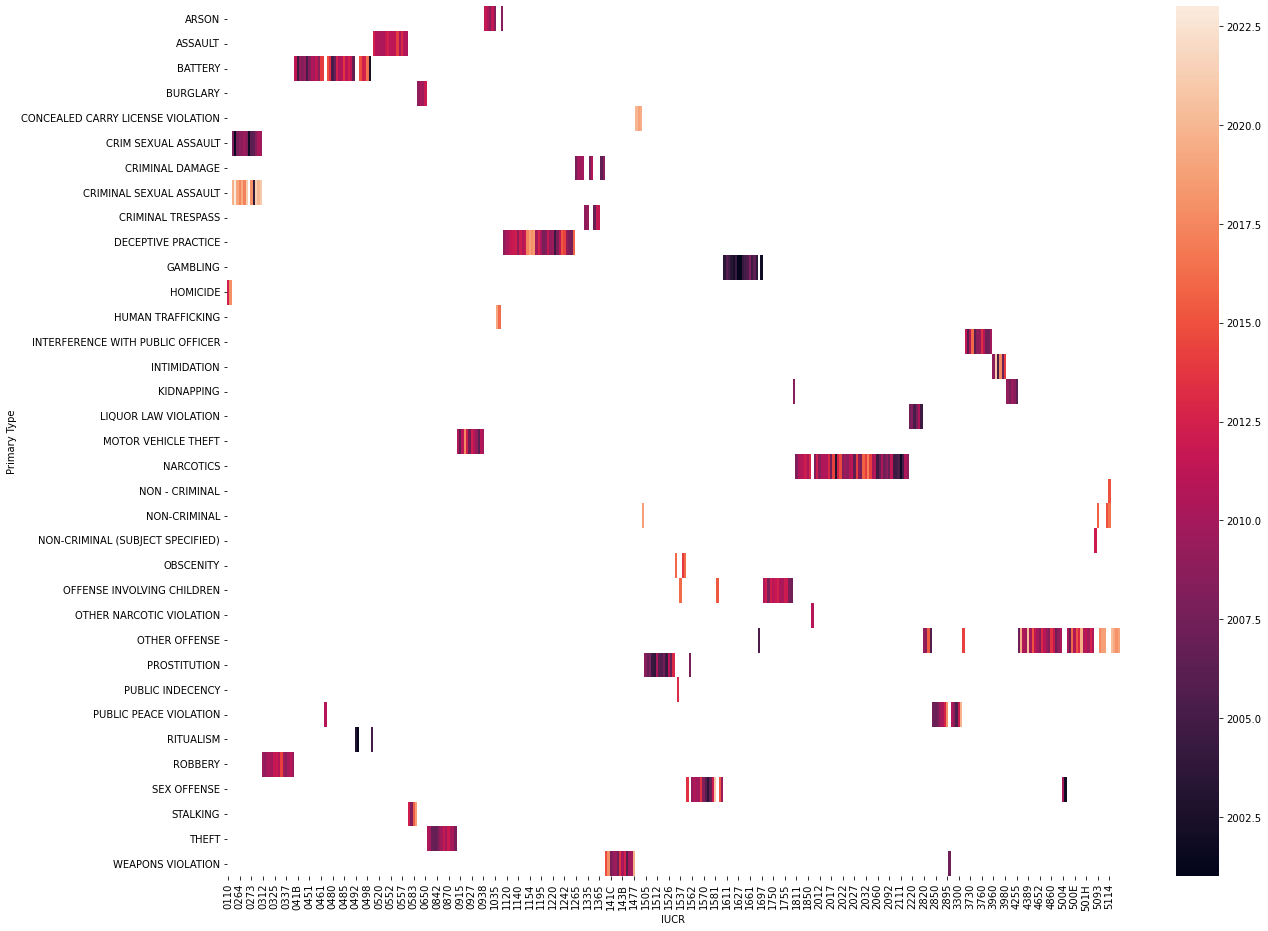

In [29]:
df_test= df.reset_index().pivot_table(index="Primary Type", columns="IUCR", values="Year")
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(df_test)
#Diagrama correlación entre 
#scatterplot por frecuencia

<AxesSubplot:xlabel='IUCR', ylabel='Primary Type'>

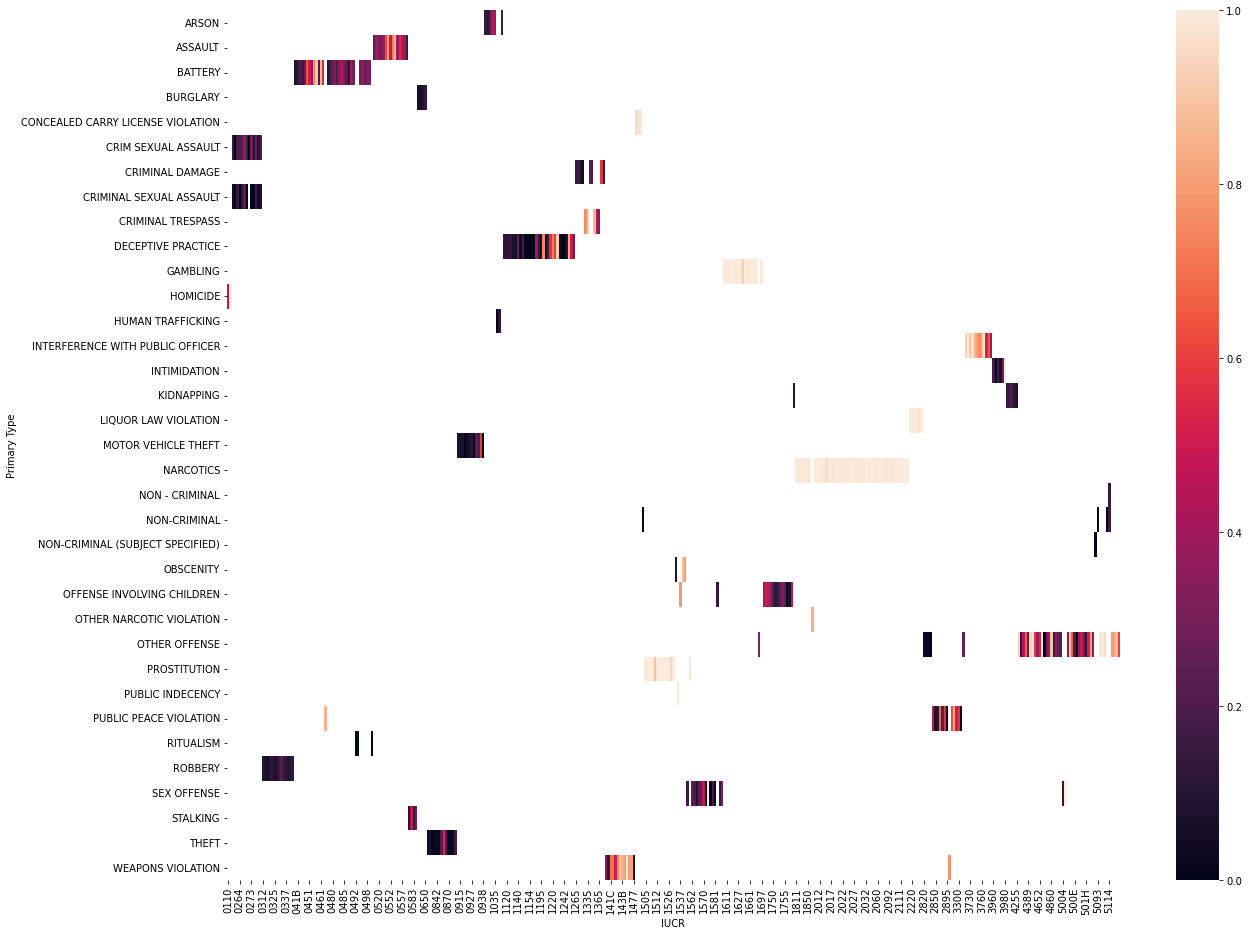

In [30]:
df_test2= df.reset_index().pivot_table(index="Primary Type", columns="IUCR", values="Arrest")
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(df_test2)
#Diagrama correlación entre 

<AxesSubplot:xlabel='Primary Type', ylabel='Count'>

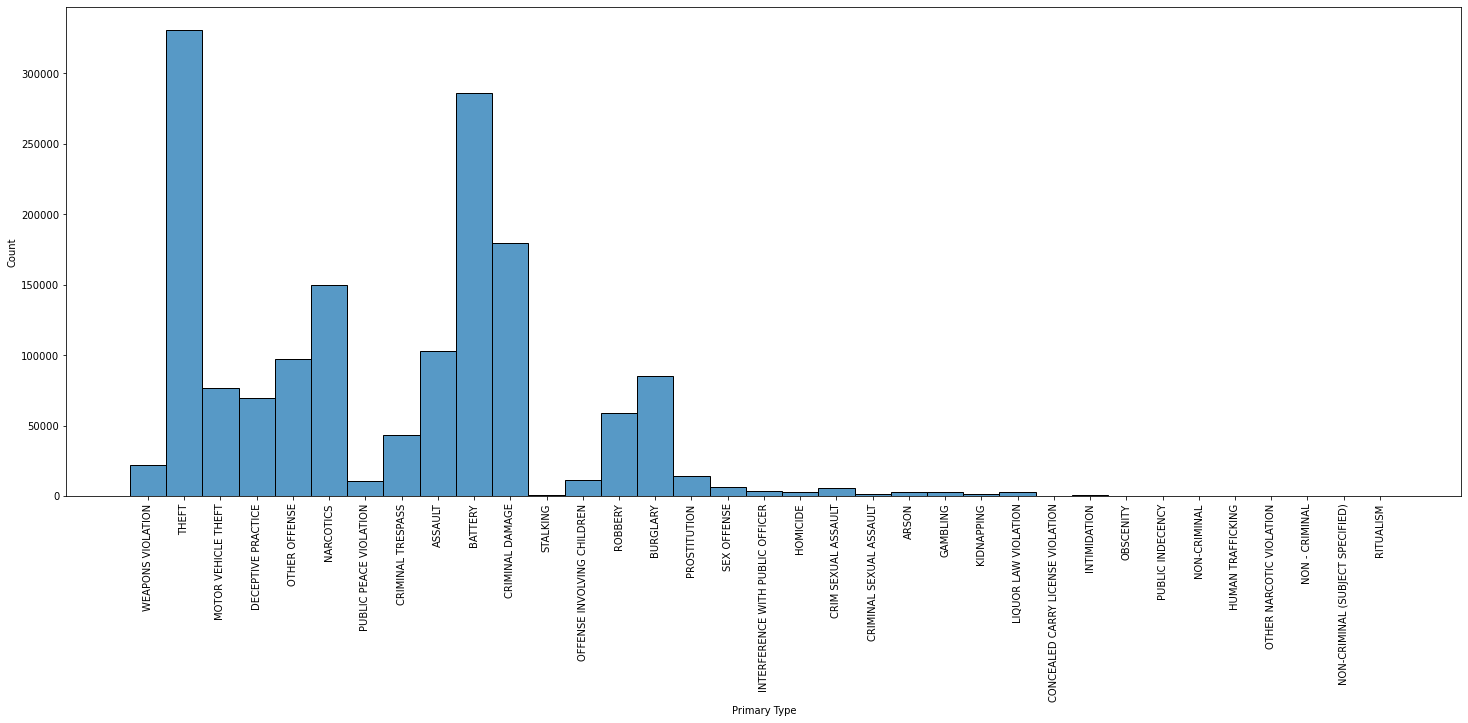

In [50]:
#Histogramas
fig, ax = plt.subplots(figsize=(25,9))
plt.xticks(rotation='vertical')
sns.histplot(df, x="Primary Type")
#piechart Graphline

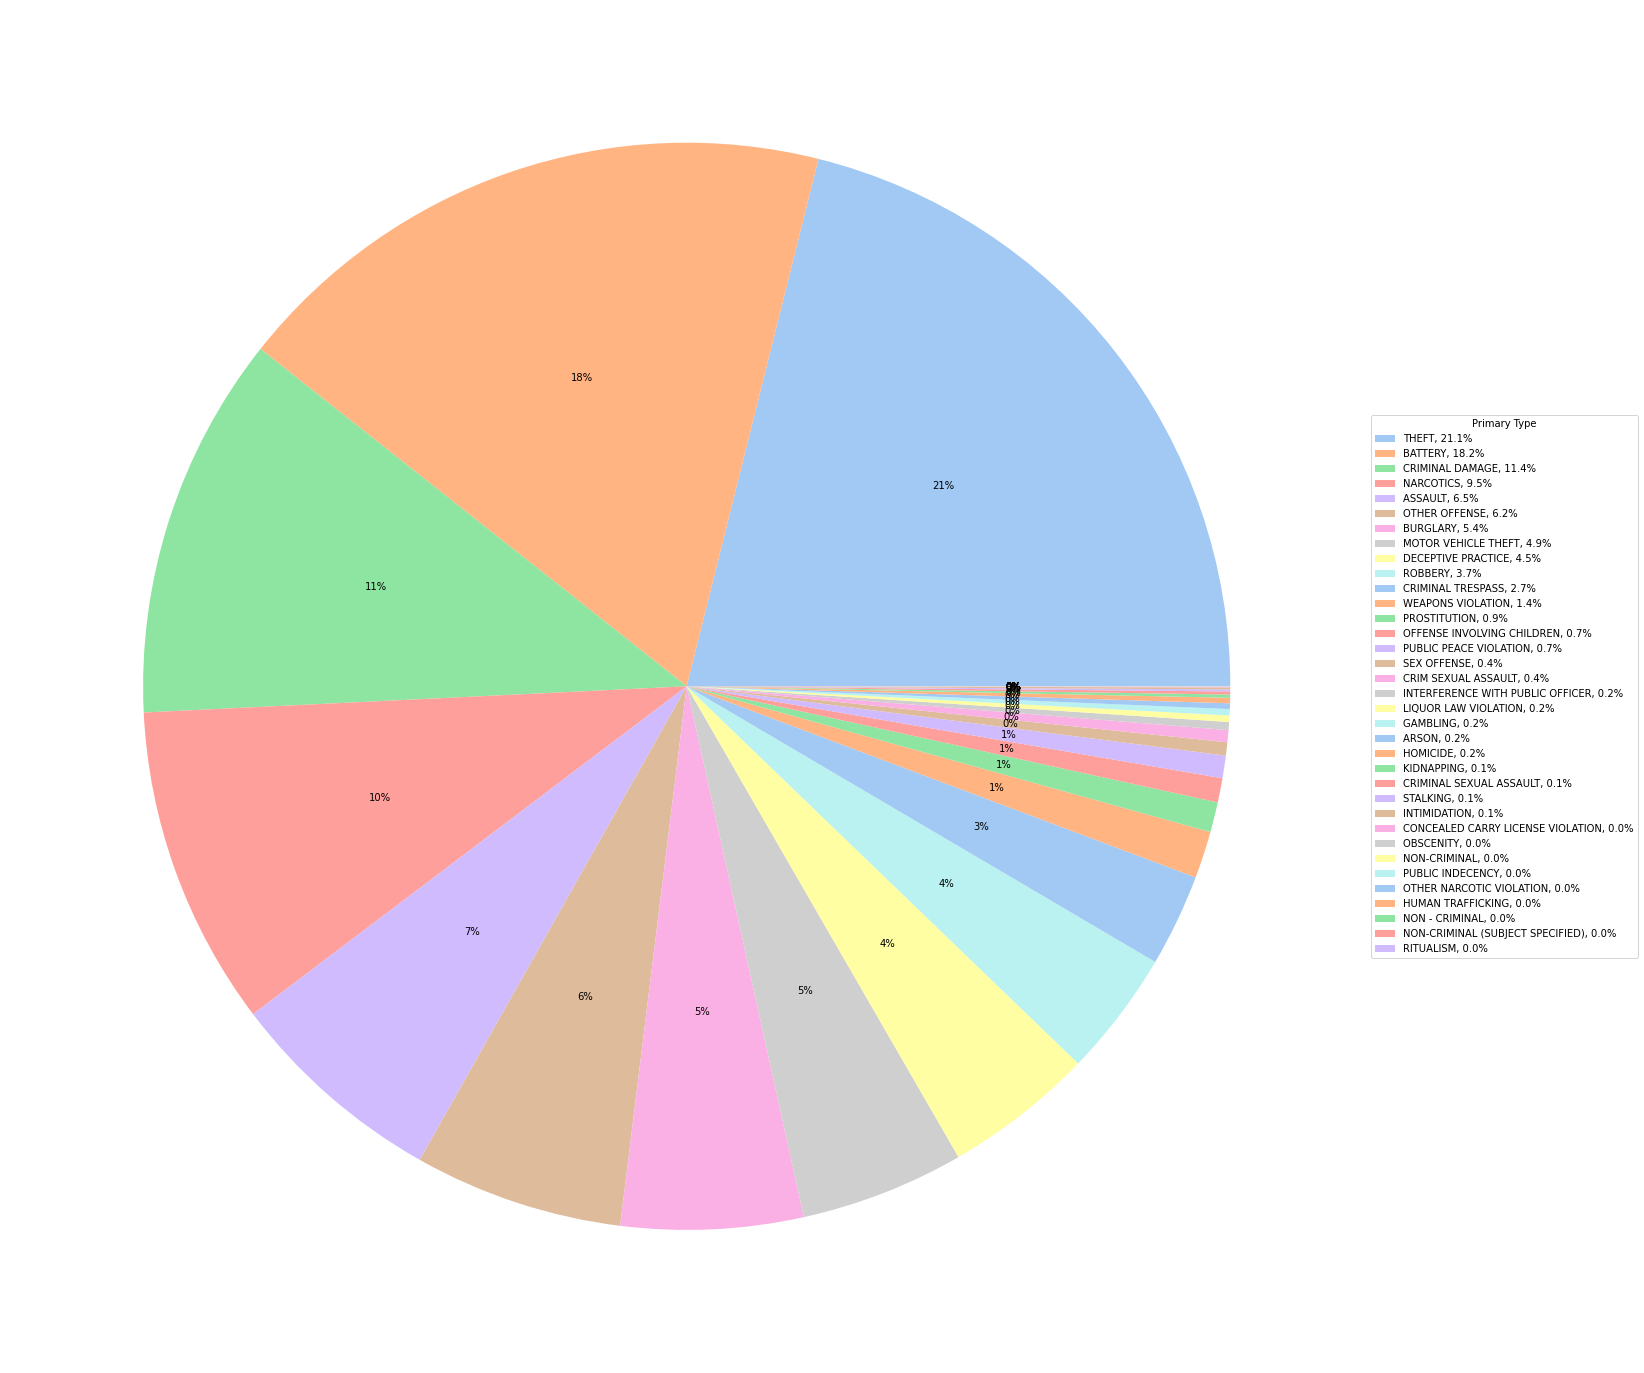

In [74]:
colors = sns.color_palette('pastel')[0:35]
plt.figure(figsize=(25, 25))
s = df["Primary Type"].value_counts()
leg = [f'{l}, {(a/s.sum())*100:0.1f}%' for l, a in zip(s.index, s)]
plt.pie(s, colors = colors, autopct='%.0f%%')
plt.legend(leg,
          title="Primary Type",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

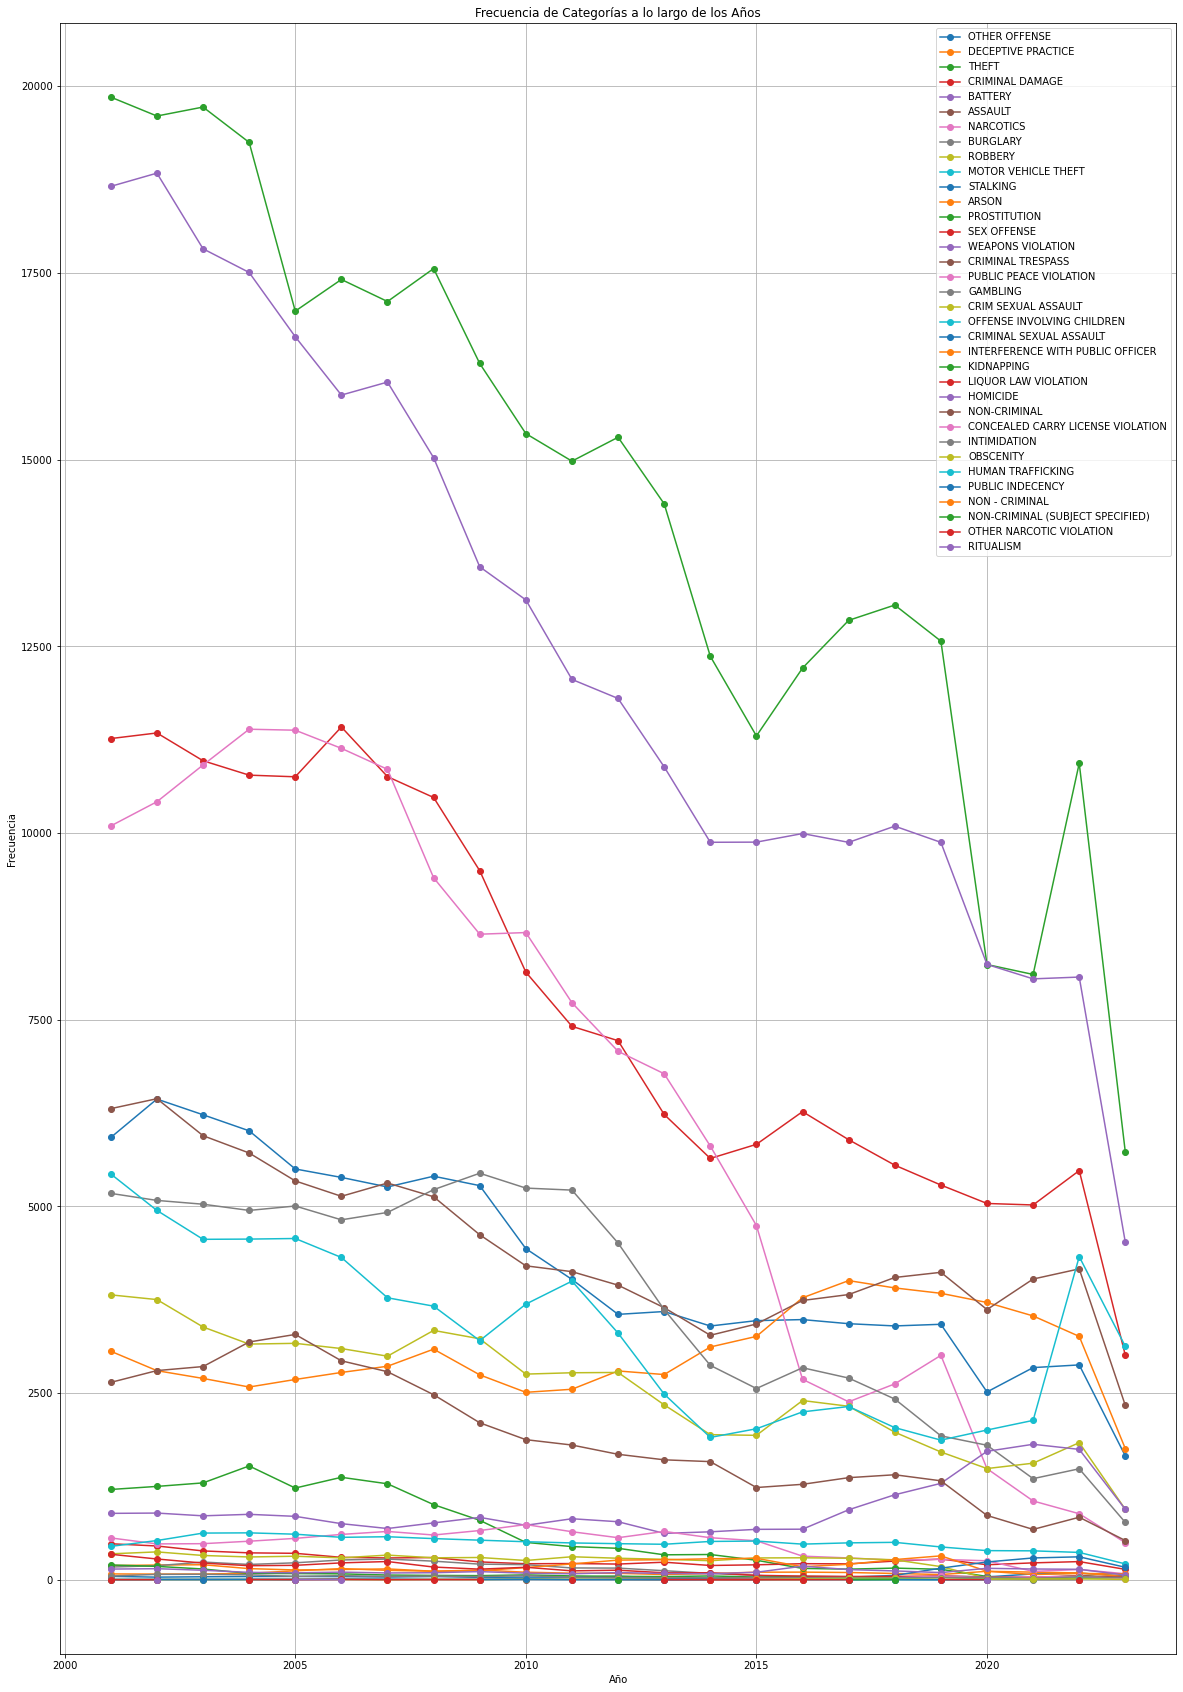

In [81]:
categorias = df["Primary Type"].unique()
# Crear un DataFrame para almacenar las frecuencias de cada categoría
frecuencias_por_categoria = pd.DataFrame()
for categoria in categorias:
    categoria_contador = df[df['Primary Type'] == categoria].groupby('Year').size()
    frecuencias_por_categoria[categoria] = categoria_contador
# Crear el gráfico de líneas
plt.figure(figsize=(20, 30))  # Tamaño de la figura (opcional)
for categoria in categorias:
    plt.plot(frecuencias_por_categoria.index, frecuencias_por_categoria[categoria], label=categoria, marker='o')
# Personalizar el gráfico
plt.title('Frecuencia de Categorías a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.grid(True)  # Mostrar una cuadrícula en el gráfico (opcional)
plt.legend()  # Mostrar la leyenda (etiquetas) en el gráfico
# Mostrar el gráfico
plt.show()
#sns.lineplot(data=df, x="Year", y="Primary Type")

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: If using all scalar values, you must pass an index

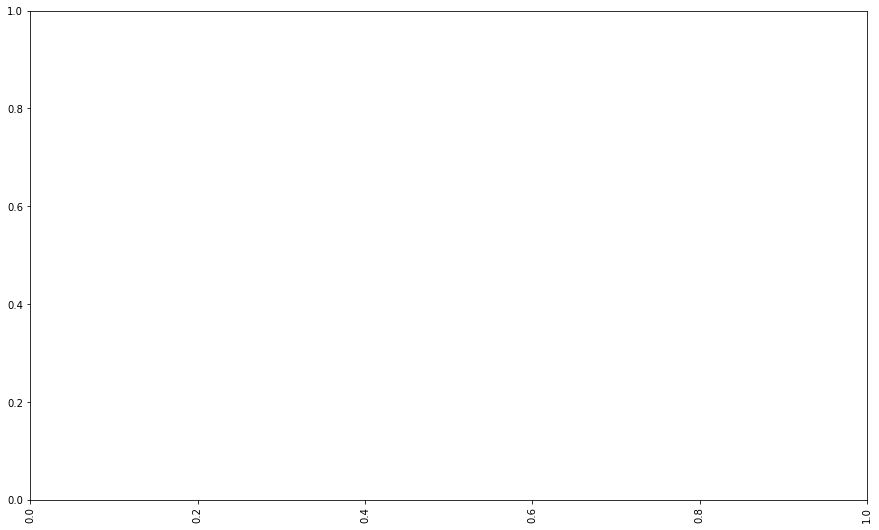

In [43]:
fig, ax = plt.subplots(figsize=(15,9))
plt.xticks(rotation='vertical')
sns.lineplot(df, x="Year")
#Change to lineplot

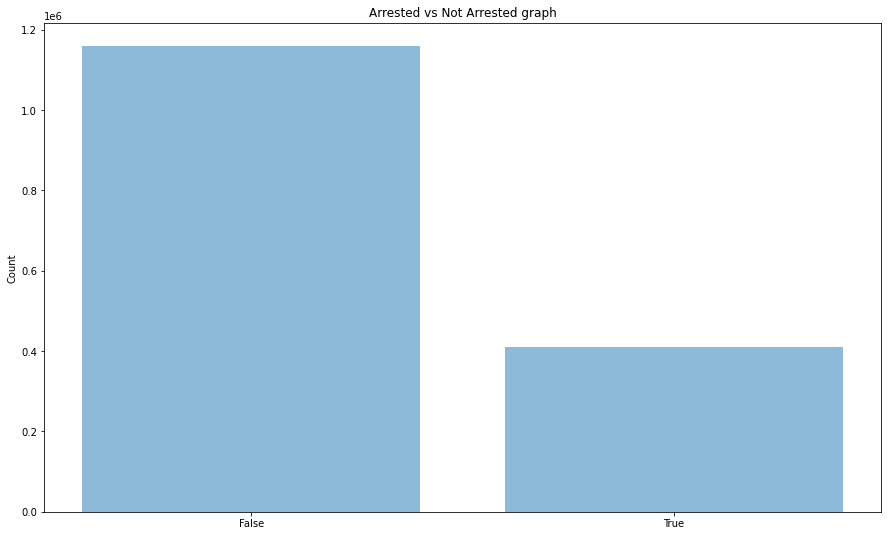

In [77]:
objects = df["Arrest"].unique()
y_pos = np.arange(len(objects))
performance = df["Arrest"].value_counts()
fig, ax = plt.subplots(figsize=(15,9))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Arrested vs Not Arrested graph')

plt.show()

In [61]:
pd.get_dummies(df["Arrest"])

,False,True
3942355,0,1
3979702,1,0
2225272,1,0
5289938,1,0
3138905,1,0
...,...,...
732923,1,0
6322590,1,0
6565268,0,1
3411119,0,1


<AxesSubplot:xlabel='1', ylabel='Count'>

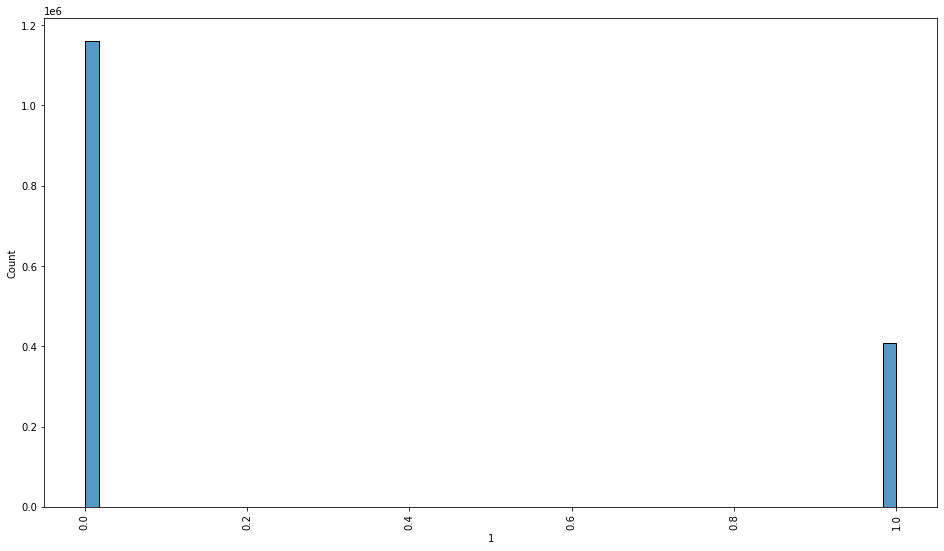

In [62]:
fig, ax = plt.subplots(figsize=(16,9))
plt.xticks(rotation='vertical')
sns.histplot(pd.get_dummies(df["Arrest"]), x=1)
#Cambiar a barras contando true false

In [10]:
df.head()
#Latitud y longitud se puede eliminar y reemplazar por district and Location Description
#Date and block 
#Leer la descripción del problema


,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,District,Year
3942355,09/18/2004 12:50:00 PM,012XX S TROY ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,True,False,10.0,2004
3979702,10/18/2004 07:50:00 PM,030XX N BROADWAY,0820,THEFT,$500 AND UNDER,False,False,19.0,2004
2225272,01/28/2001 05:00:00 PM,070XX S PULASKI RD,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,False,False,8.0,2001
5289938,07/27/2007 12:00:00 AM,063XX S ROCKWELL ST,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,False,False,8.0,2007
3138905,01/03/2003 09:50:00 AM,046XX W WARWICK AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,False,False,17.0,2003


In [1]:
df.groupby("District")

NameError: name 'df' is not defined

In [34]:
dummies = pd.get_dummies(df['Primary Type'])
dummies

,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
2317168,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3384443,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4880099,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7368205,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1112874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308723,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3414203,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4909533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5945472,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
from sklearn import preprocessing
y = df["Primary Type"]
#X = pd.get_dummies(df, columns = ['Arrest','Domestic',"IUCR","Description"])
X = df

le = preprocessing.LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
X[:,1] = le.fit_transform(X[:,1])
X[:,2] = le.fit_transform(X[:,2])
X[:,3] = le.fit_transform(X[:,3])

In [86]:
dfAuxiliar

,0,1,2,3,4,5,6,7
0,89,325,0,0,25.0,2001,41.937924,-87.7273
1,33,68,0,0,3.0,2005,41.780266,-87.614091
2,158,447,1,0,25.0,2005,41.90951,-87.754997
3,33,68,1,0,22.0,2007,41.692352,-87.642777
4,204,5,0,0,12.0,2008,NaN,NaN
...,...,...,...,...,...,...,...,...
1569357,102,132,0,0,7.0,2020,41.764807,-87.635868
1569358,40,411,0,0,25.0,2001,41.91157,-87.758035
1569359,179,384,0,0,8.0,2023,41.778452,-87.740433
1569360,98,333,0,0,18.0,2006,41.918319,-87.639119


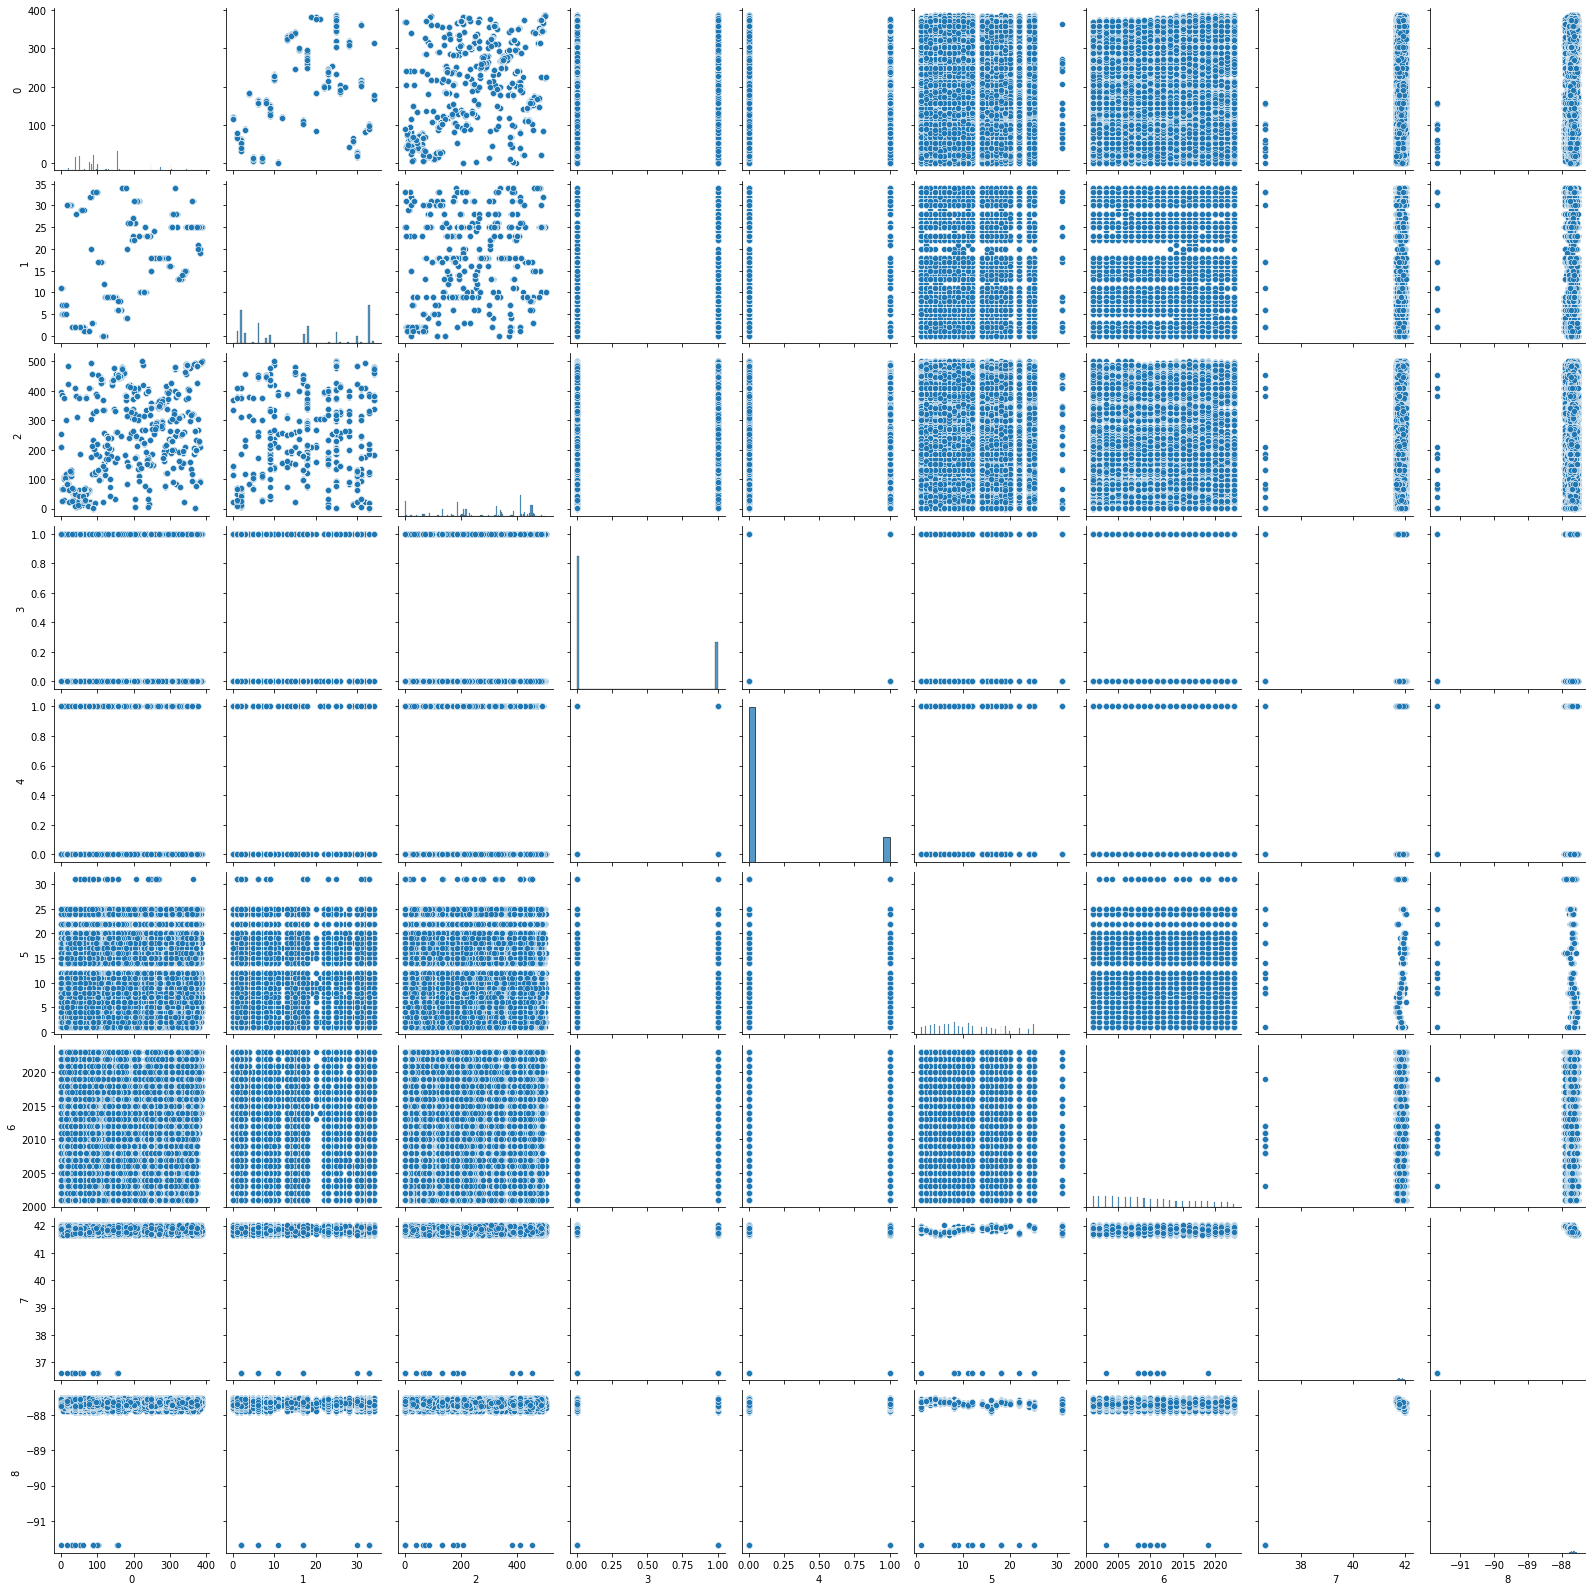

In [92]:
dfAuxiliar=pd.DataFrame(X)
sns.pairplot(dfAuxiliar, kind="scatter")
plt.show()

In [89]:
X2 = df.values
X2
le = preprocessing.LabelEncoder()
X2[:,0] = le.fit_transform(X2[:,0])
X2[:,1] = le.fit_transform(X2[:,1])
X2[:,2] = le.fit_transform(X2[:,2])
X2[:,3] = le.fit_transform(X2[:,3])
X2[:,4] = le.fit_transform(X2[:,4])

In [91]:
dfAuxiliar2=pd.DataFrame(X2)
sns.pairplot(dfAuxiliar2, kind="scatter")
plt.show()

,0,1,2,3,4,5,6,7,8
0,89,33,325,0,0,25.0,2001,41.937924,-87.7273
1,33,2,68,0,0,3.0,2005,41.780266,-87.614091
2,158,8,447,1,0,25.0,2005,41.90951,-87.754997
3,33,2,68,1,0,22.0,2007,41.692352,-87.642777
4,204,31,5,0,0,12.0,2008,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1569357,102,17,132,0,0,7.0,2020,41.764807,-87.635868
1569358,40,2,411,0,0,25.0,2001,41.91157,-87.758035
1569359,179,34,384,0,0,8.0,2023,41.778452,-87.740433
1569360,98,33,333,0,0,18.0,2006,41.918319,-87.639119


In [36]:
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('household_data.txt') 
X = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values 
labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0])
X[:,1] = labelencoder_X.fit_transform(X[:,1])
print(X)

,Date,IUCR,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
2317168,04/10/2001 11:31:32 AM,0460,SIMPLE,RESIDENCE,False,True,621,6.0,NaN,2001,...,0,0,0,0,0,0,0,0,0,0
3384443,07/15/2003 05:00:00 PM,0420,AGGRAVATED:KNIFE/CUTTING INSTR,STREET,False,False,2433,24.0,40.0,2003,...,0,0,0,0,0,0,0,0,0,0
4880099,11/08/2006 07:54:13 PM,0520,AGGRAVATED:KNIFE/CUTTING INSTR,ALLEY,False,False,935,9.0,11.0,2006,...,0,0,0,0,0,0,0,0,0,0
7368205,06/23/2013 08:00:00 PM,1320,TO VEHICLE,STREET,False,False,432,4.0,10.0,2013,...,0,0,0,0,0,0,0,0,0,0
1112874,04/17/2018 10:41:00 PM,141A,UNLAWFUL USE HANDGUN,SIDEWALK,False,False,631,6.0,8.0,2018,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308723,05/13/2003 03:47:44 PM,1320,TO VEHICLE,OTHER,False,False,624,6.0,8.0,2003,...,0,0,0,0,0,0,0,0,0,0
3414203,08/06/2003 11:00:00 PM,1320,TO VEHICLE,STREET,False,False,2133,2.0,5.0,2003,...,0,0,0,0,0,0,0,0,0,0
4909533,12/04/2006 11:27:00 AM,0810,OVER $500,PAWN SHOP,True,False,1422,14.0,26.0,2006,...,0,0,0,0,0,0,0,0,1,0
5945472,05/21/2009 02:29:50 PM,0486,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,False,2432,24.0,49.0,2009,...,0,0,0,0,0,0,0,0,0,0
